## Research Question
### 1) Primary: Which specific predictive factors are linked with student graduation? 
### 2) Secondary Question: 
### 1. If there any demographic characteristics are associated with higher student success rates. 
### 2. How students' socioeconomic status, represented by debt, tuition fees up to date and scholarship holder, impacts their likelihood of graduation.


# **EDA**

In [2]:
# Data analysis imports 
import pandas as pd
import numpy as np

# Visualisation imports 
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing imports 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Supervised learning module imports 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import sys
#!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

# Classification and confusion matric imports 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score


In [4]:
df = pd.read_csv("/Users/zzze/Desktop/GitHub/final-project-zhenze-dropout-rate/dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [4]:
row_num = df.shape[0]
column_num = df.shape[1]

print(f"There are {row_num} rows and {column_num} columns")

There are 4424 rows and 35 columns


In [5]:
missing_values_count = df.isnull().sum()
missing_values_count
print("There is no missing data")

There is no missing data


In [6]:
cols = df.columns
predictors = df[cols[0:34]]
target = df[cols[34]]

#we have a lot of caregorical varibales, might not be a good idea to use logistic regression. 
Categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 
            'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 
            'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 
            'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'] 
Numeric_features = list(set(df.columns)-set(Categorical_features)-set(['Target']))



- #### Dempgraphic data: marital status, nationality, displaced, gender, age at enrollment, international
- #### Socioeconomic data: mother's qualification, father's qualification, mother's occupation, father's occupation, educational special needs, debtor, tuition fees up to date, and scholarship holder
- #### Macroeconomic data: unemployment rate, inflation rate, GDP
- #### Academic data at enrollment: appliation mode, application order, course, daytime/evening attendance,previous qualification 
- #### Acaddemic data at the end of 1st semester: curricular units 1st sem (credited), curricular units 1st sem (enrolled), curricular units 1st sem (evaluations), curricular units 1st sem (approved), curricular units 1st sem (grade), curricular units 1st sem (without evaluations)
- #### Academic data at the end of 2nd semester

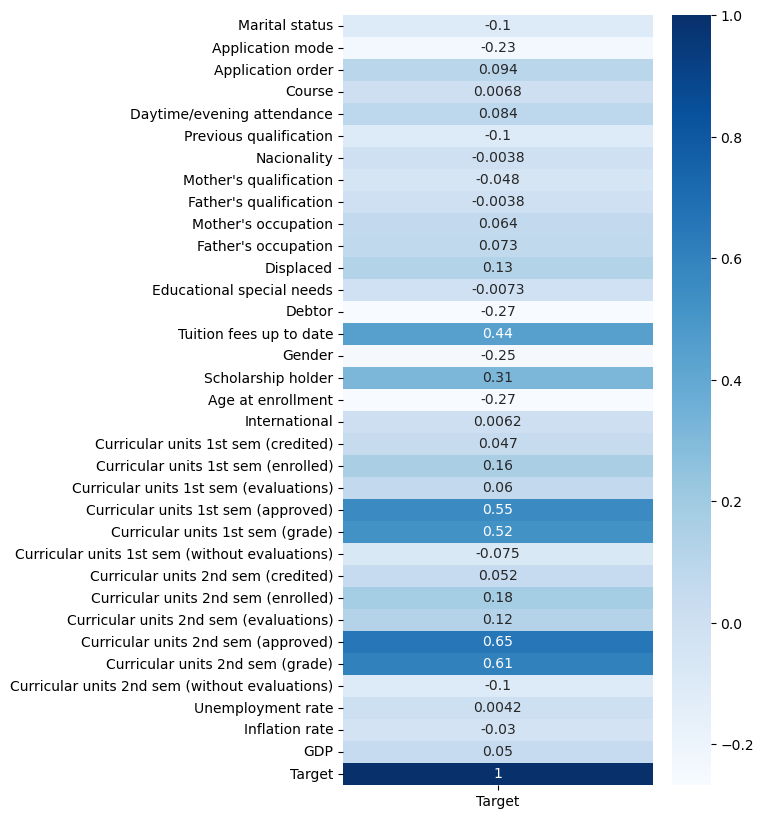

In [7]:
# change the target column to 0/1, I am going to drop the enrolled rows because I want to focus on dropout and graduate only
encoder = {'Dropout':0,'Graduate':1} 
target_encoder = df['Target'].map(encoder)
target_encoder = target_encoder.dropna() #drop the NaN rows
df['Target'] = target_encoder

#correlations between predictors and outcomes
num = df['Target'].value_counts()  
plt.figure(figsize=(5,10))
sns.heatmap(df.corr()[['Target']], cmap="Blues", annot=True)
plt.show()

- #### Examining the correlations between variables and target, I'll suggest removing columns with an absolute correlation coefficient less than 0.01, which are Course, Nationality, Father's qualification, Educational special needs, International, and unemployment rate. 

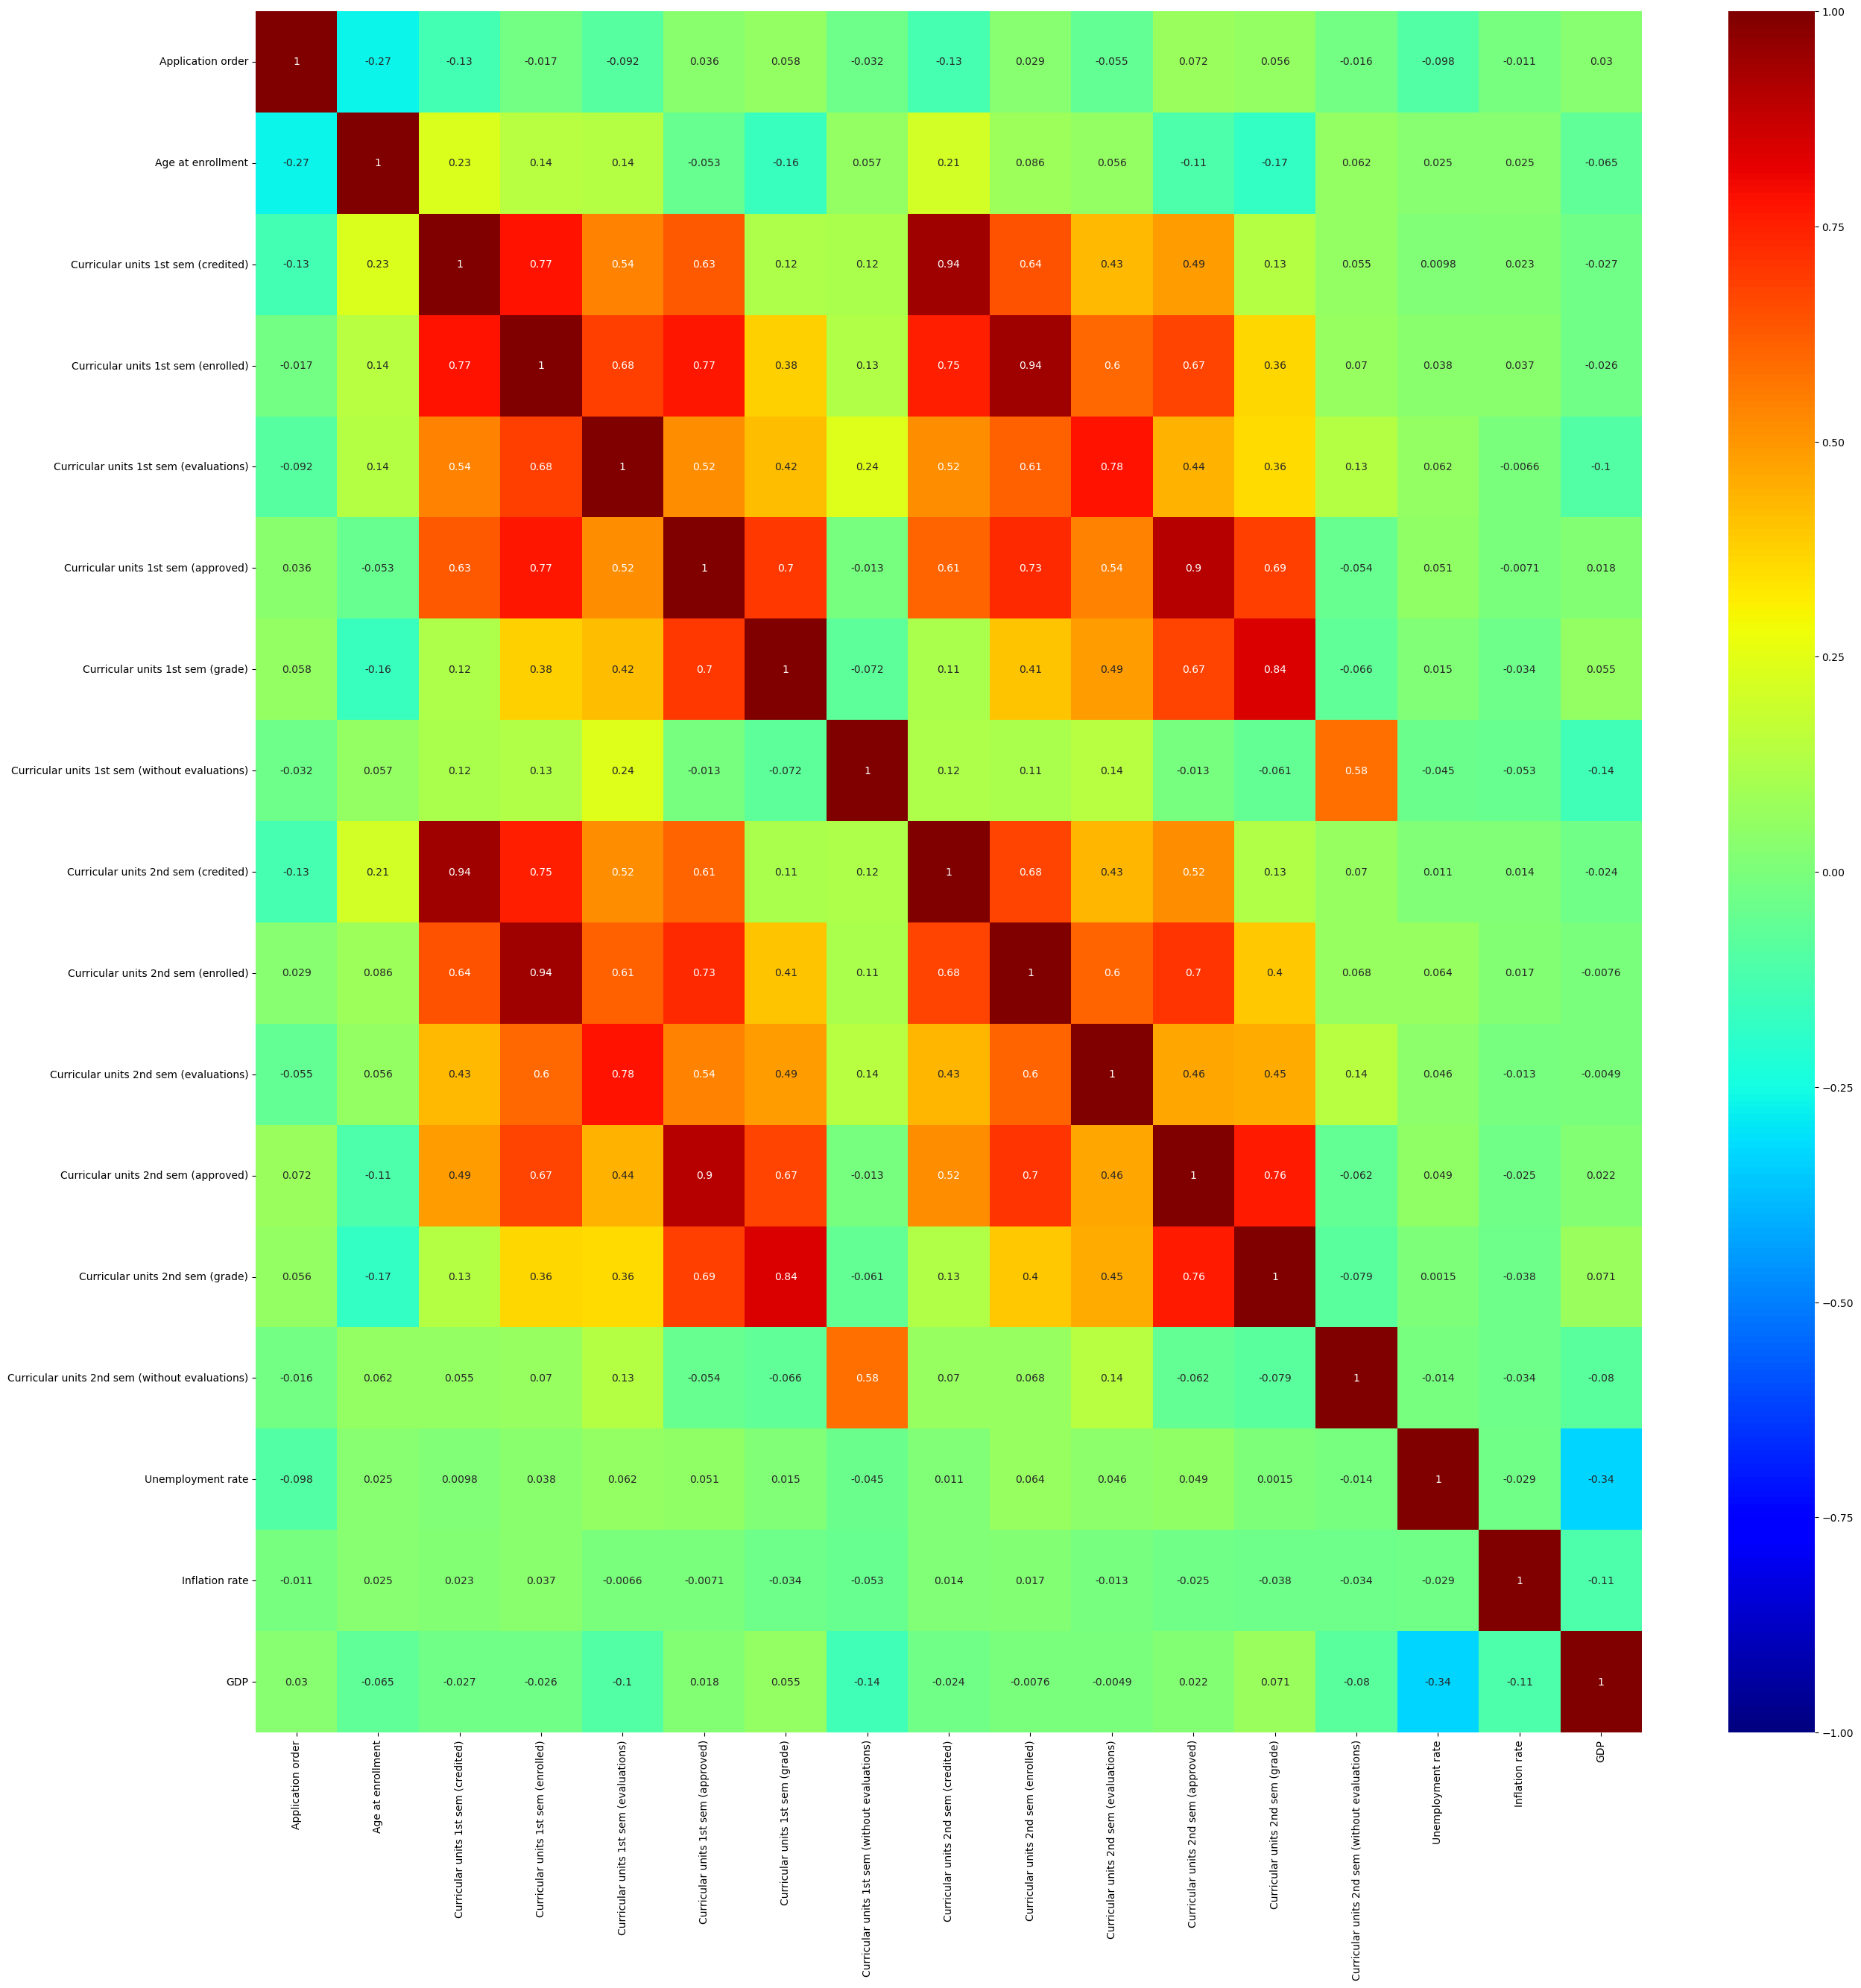

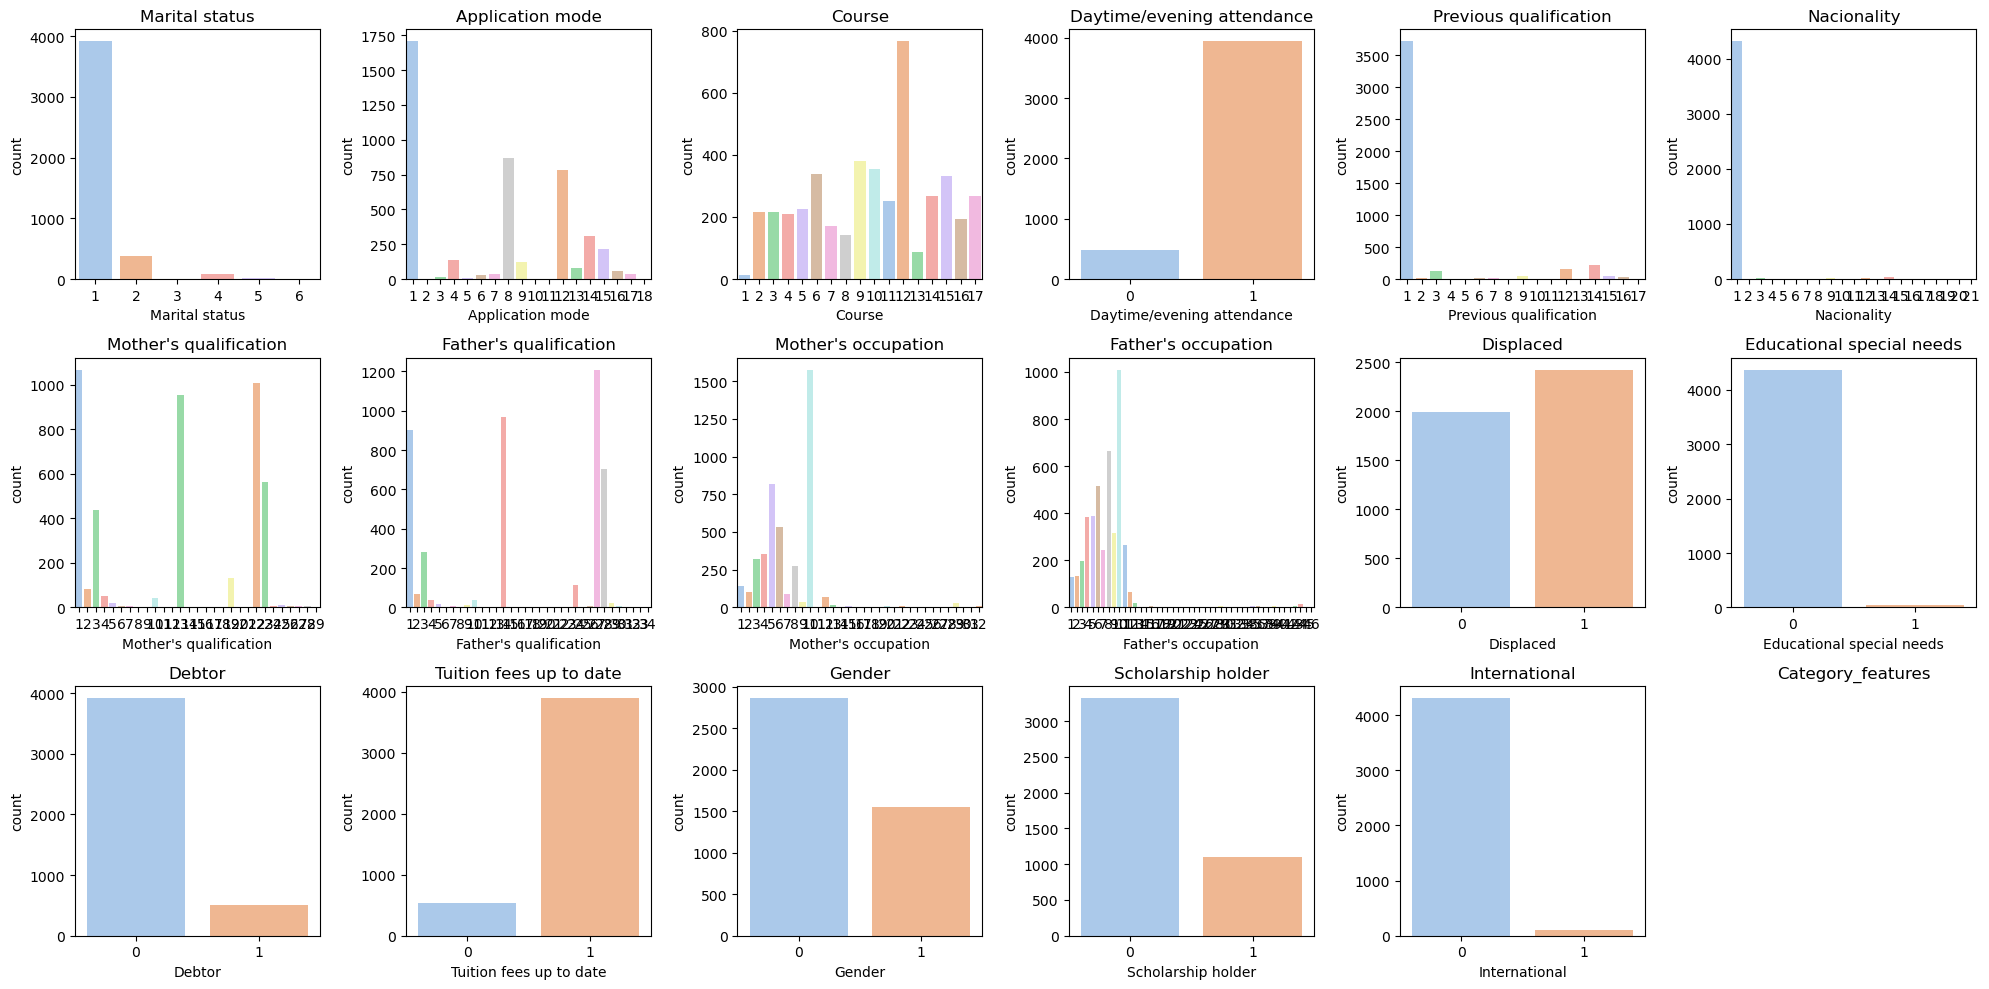

In [8]:
#the correlation between numerical varibles. 
num_predictors = predictors.drop(Categorical_features, axis = 1)
cate_predictors = predictors.drop(Numeric_features, axis =1)
plt.figure(figsize=(30,30))
sns.heatmap(num_predictors.corr(),vmin=-1, vmax=1, cmap="jet", annot=True)
plt.show()
 
#use countplot to count the categorical variables 
fig, axes = plt.subplots(3, 6, figsize=(20,10))
plt.title("Category_features")
for k in range(len(Categorical_features)):
  sns.countplot(ax=axes[k//6][k%6], data=df, x=Categorical_features[k], palette=sns.color_palette('pastel'))
  axes[k//6][k%6].set_title(Categorical_features[k])
axes[-1][-1].axis('off')
plt.tight_layout()
plt.show()


- #### From the correlations between numerical variable, we know that the curricular units are highly correlated with each others --> maybe sum them up. 
- #### From the countplots for the categorical variables, we see that the previous qualification, nationality, educational special needs, and international are highly imbalanced. Thus, I decide to exlude those variables from the dataset. 
- #### Now, let me plot some stacked bar charts to show the total number of dropout, and total number of graduated students in different predictors. 

# Demographic data
### Marital status 

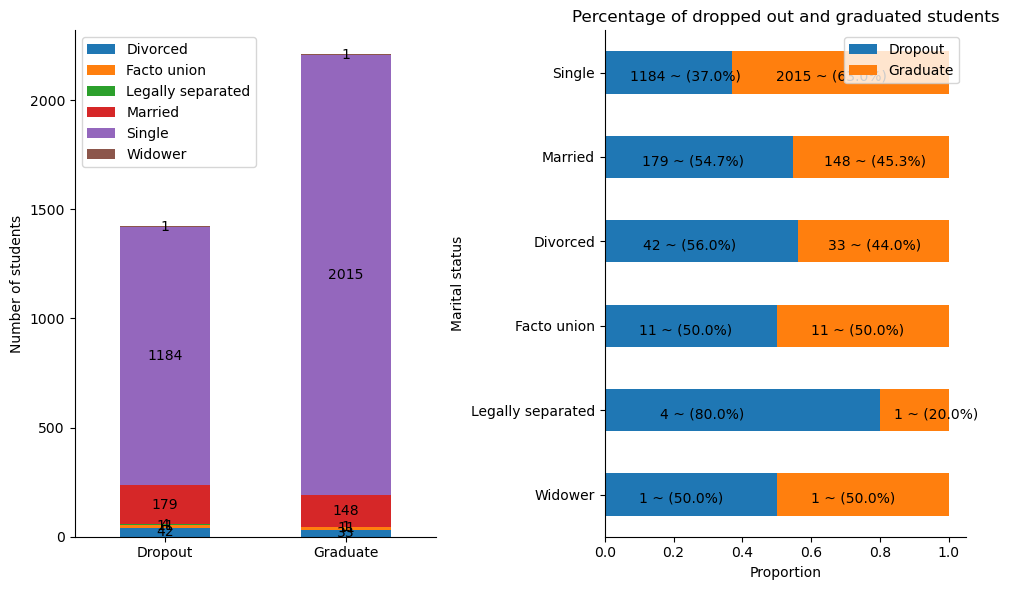

In [9]:
df = df.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 
                                    5: 'Facto union', 6: 'Legally separated'}})
df = df.replace({'Target': {0: 'Dropout', 1: 'Graduate'}})
# Create a stacked barchart.
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)
data = df['Marital status'].value_counts()
order = data.index
ax1 = fig.add_subplot(gs[0, 0])
data = df.groupby(['Marital status', 'Target']).size().reset_index().pivot(columns='Marital status', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True)
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True)
ax2.set(xlabel='Proportion', ylabel='Marital status')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()


### Gender

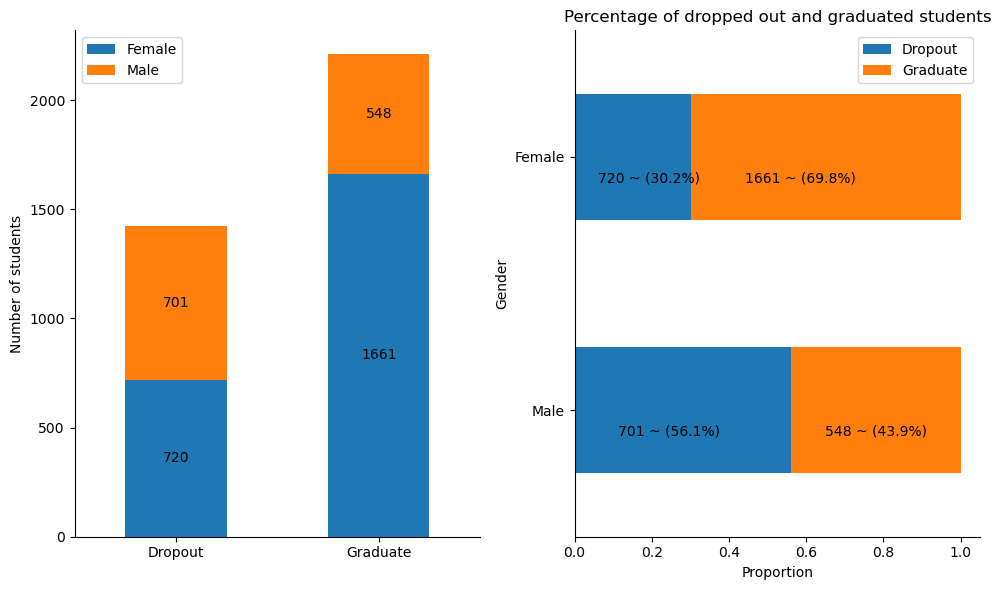

In [10]:
# for the purpose of plotting, I will change numbers to meaningful words. 
df = df.replace({'Gender': {0: 'Female', 1: 'Male'}})
df = df.replace({'Target': {0: 'Dropout', 1: 'Graduate'}})
# Create a stacked barchart.
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)
data = df['Gender'].value_counts()
order = data.index
ax1 = fig.add_subplot(gs[0, 0])
data = df.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True)
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)


ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Gender'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Gender'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True)
ax2.set(xlabel='Proportion', ylabel='Gender')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

### Displaced 


[Text(0.5, 1.0, 'Not Displaced')]

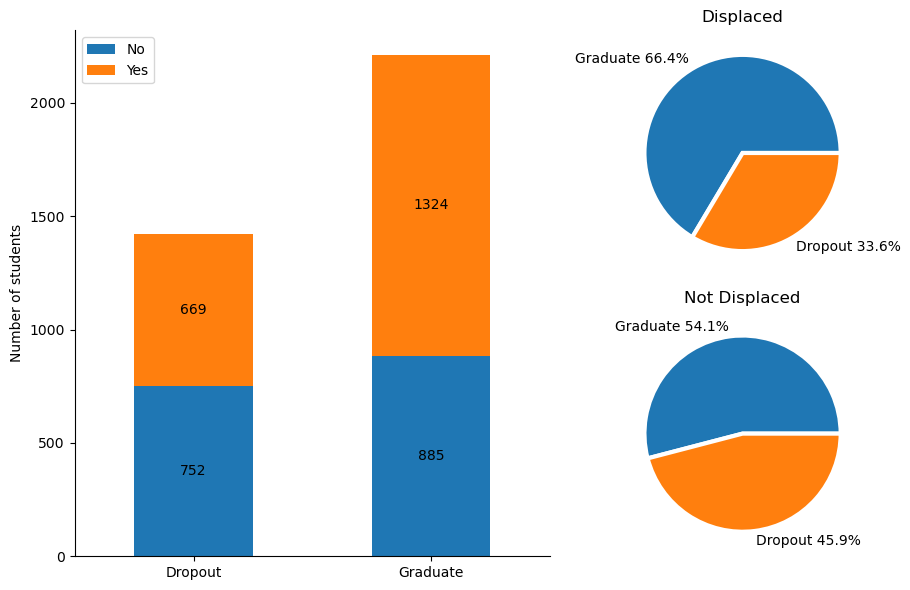

In [11]:
df = df.replace({'Displaced': {0: 'No', 1: 'Yes'}})

fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows= 2, ncols=2)
data = df['Displaced'].value_counts()
order = data.index
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Displaced', 'Target']).size().reset_index().pivot(columns='Displaced', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True)
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)



ax2 = fig.add_subplot(gs[0, 1])
displaced = df[(df['Displaced'] == "Yes") & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(displaced[label] / displaced.sum() * 100, 1)}%' for label in displaced.index]
patches, texts = ax2.pie(displaced, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Displaced')

notdisplaced = df[(df['Displaced'] == "No") & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(notdisplaced[label] / notdisplaced.sum() * 100, 1)}%' for label in notdisplaced.index]
ax2 = fig.add_subplot(gs[1, 1])
patches, texts = ax2.pie(notdisplaced, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Not Displaced')

### Age at enrollment

Text(0.5, 1.0, 'Distribution of students by age groups')

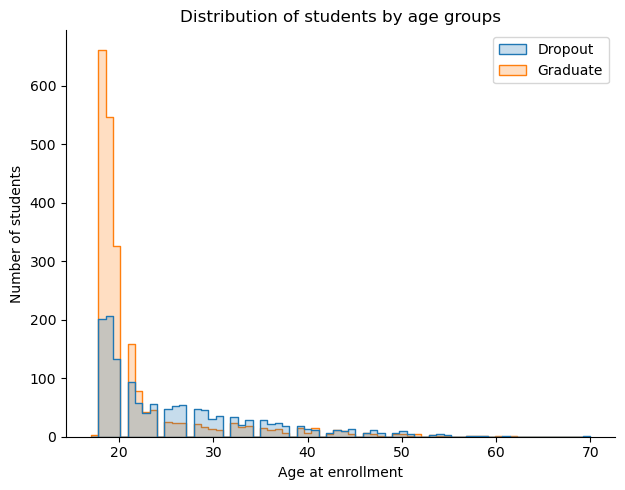

In [12]:
# Create a histogram.
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)
ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.histplot(data=df, x='Age at enrollment', hue='Target', element='step')
ax1.set(ylabel='Number of students')
ax1.legend_.set_title(None)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Distribution of students by age groups')

# Socioeconomic data

### Debtor

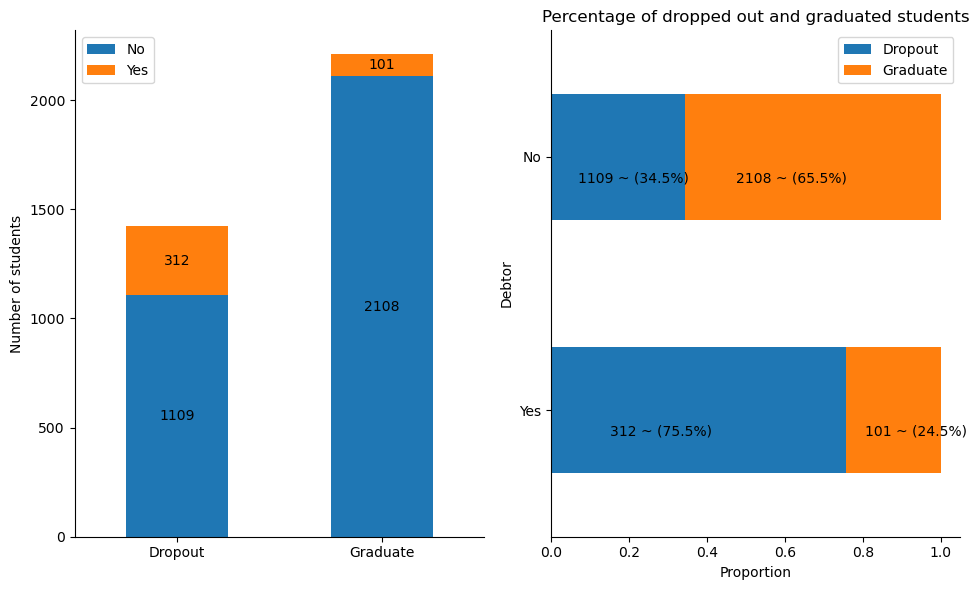

In [13]:
df = df.replace({'Debtor': {0: 'No', 1: 'Yes'}})
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)
data = df["Debtor"].value_counts()
order = data.index
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(["Debtor", 'Target']).size().reset_index().pivot(columns="Debtor", index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True)
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Debtor'], columns=df[df['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df['Debtor'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True)
ax2.set(xlabel='Proportion', ylabel='Debtor')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()


### Tuition fees up to date

<Axes: xlabel='Tuition fees up to date', ylabel='count'>

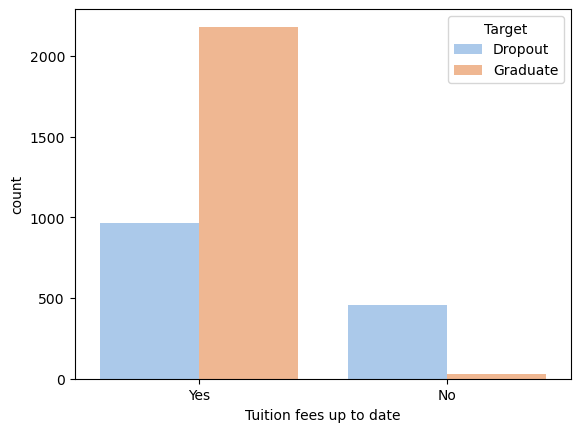

In [14]:
df = df.replace({'Tuition fees up to date': {0: 'No', 1: 'Yes'}})
sns.countplot(data=df, x=Categorical_features[13], hue = "Target", palette=sns.color_palette('pastel'))

### Scholarship holder

<Axes: xlabel='Scholarship holder', ylabel='count'>

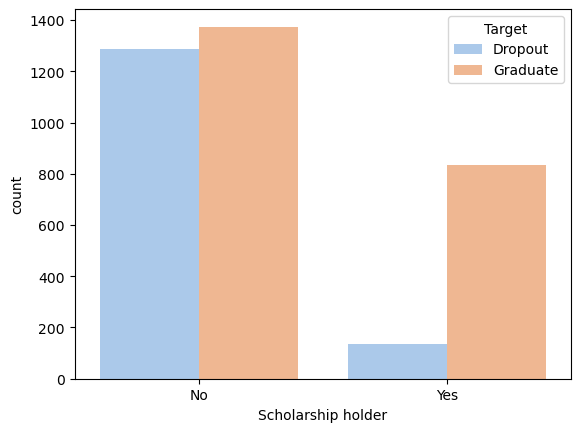

In [15]:
df = df.replace({'Scholarship holder': {0: 'No', 1: 'Yes'}})
sns.countplot(data=df, x=Categorical_features[15], hue = "Target", palette=sns.color_palette('pastel'))

# Academic data 
## at the end of 1st and 2nd semesters 

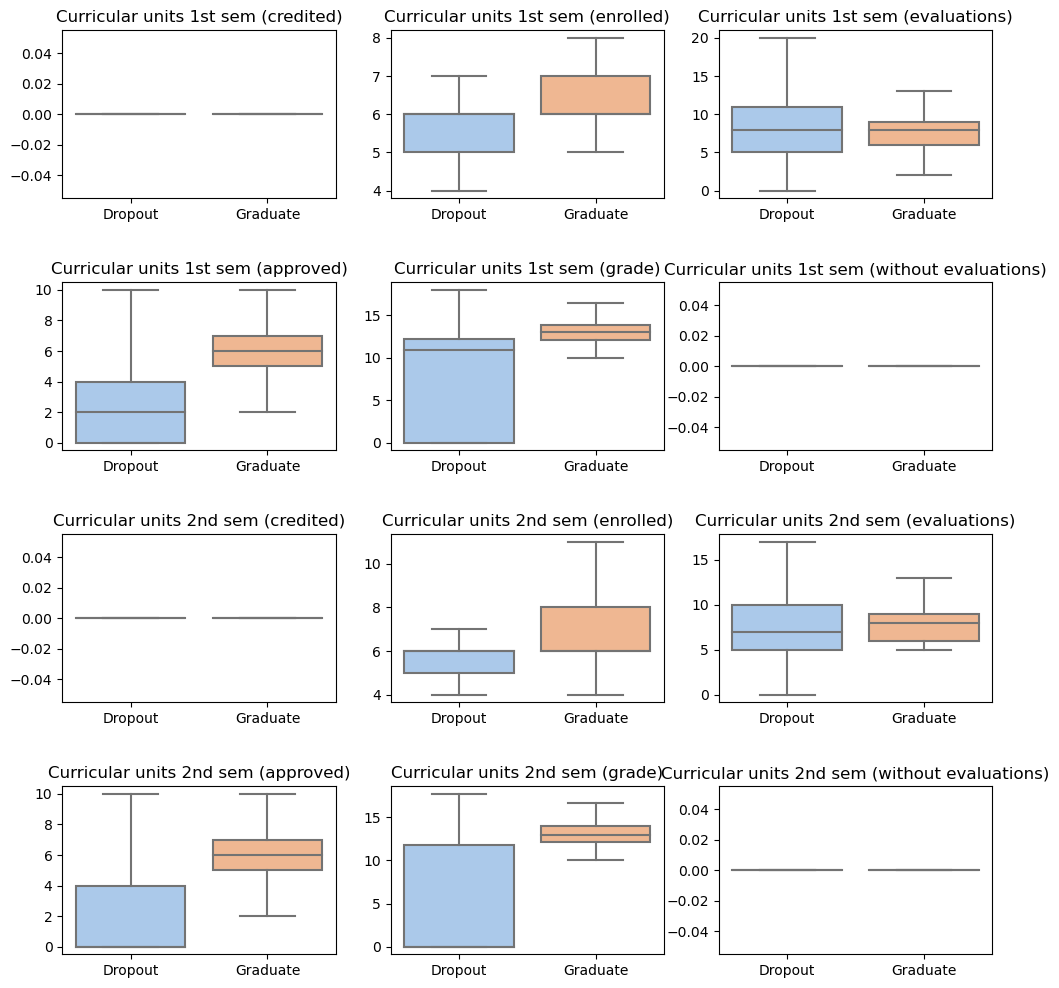

In [16]:
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']

index = 0 

for i in range(4):
    for j in range(3):
        sns.boxplot(df, x='Target', y=cols[index], showfliers=False, palette='pastel', ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1

- ### We see that Curricular units 1st sem (credited), Curricular units 1st sem (evaluation), Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited), Curricular units 2nd sem (evaluation), Curricular units 2nd sem (without evaluations) do not contribute a lot of differences in dropout and graduate. Therefore, I decide to exclude them from the data modeling later. 

## Relationship between the academic data

- ### Curricular units 1st sem (approved) and Curricular units 2nd sem (approved) seem to have very large discrepancies between dropout and graduate. Might be important factors that contribute to the graduation. Let's plot them

/Users/zzze/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/zzze/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


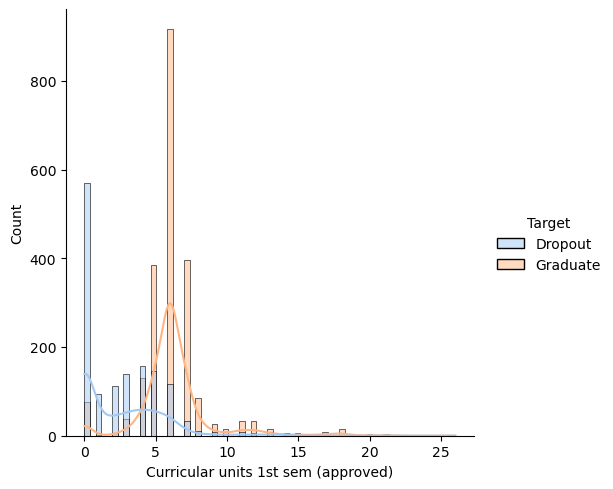

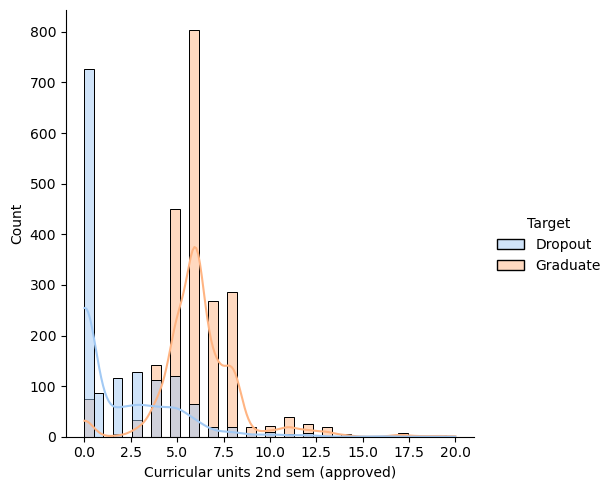

In [17]:
sns.displot(data=df, x='Curricular units 1st sem (approved)', hue='Target', palette='pastel', kde=True)
sns.displot(data=df, x='Curricular units 2nd sem (approved)', hue='Target', palette='pastel', kde=True)
plt.show()

/Users/zzze/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/zzze/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


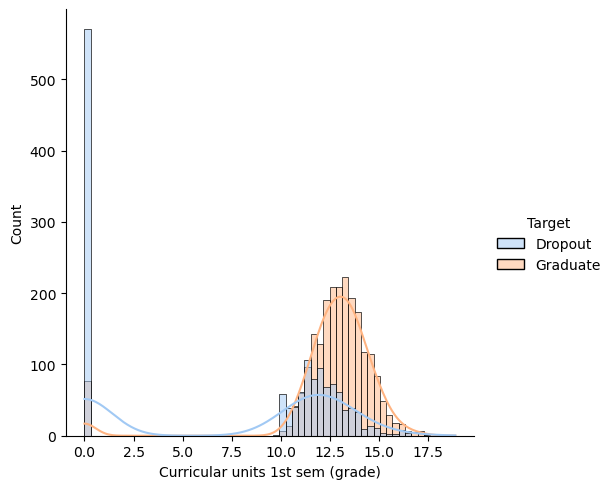

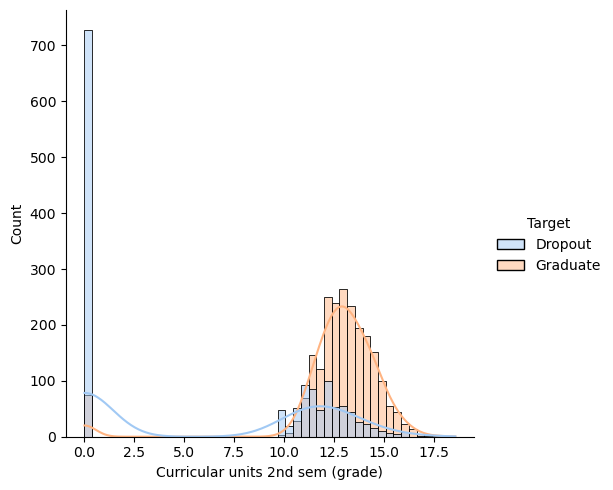

In [18]:
sns.displot(data=df, x='Curricular units 1st sem (grade)', hue='Target', palette='pastel', kde=True)
sns.displot(data=df, x='Curricular units 2nd sem (grade)', hue='Target', palette='pastel', kde=True)
plt.show()

- ### The above plots support our hypothesis. 
- ### Now let's see if there are some other relationship between academic variables and if they can be combined together. 

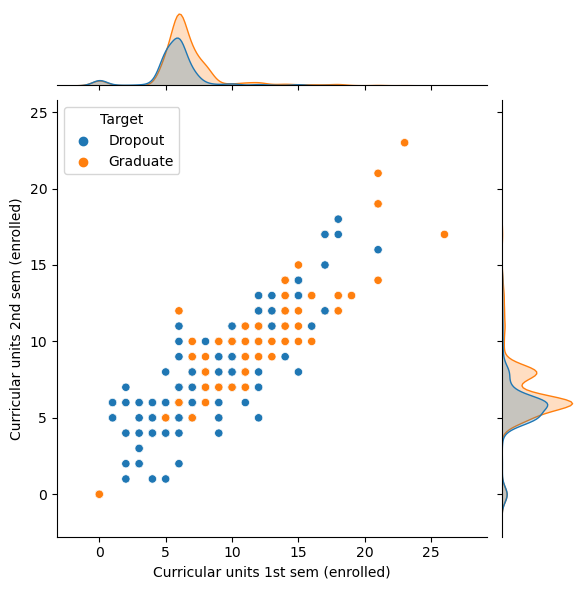

In [19]:
sns.jointplot(data=df, x='Curricular units 1st sem (enrolled)', y='Curricular units 2nd sem (enrolled)', hue="Target")

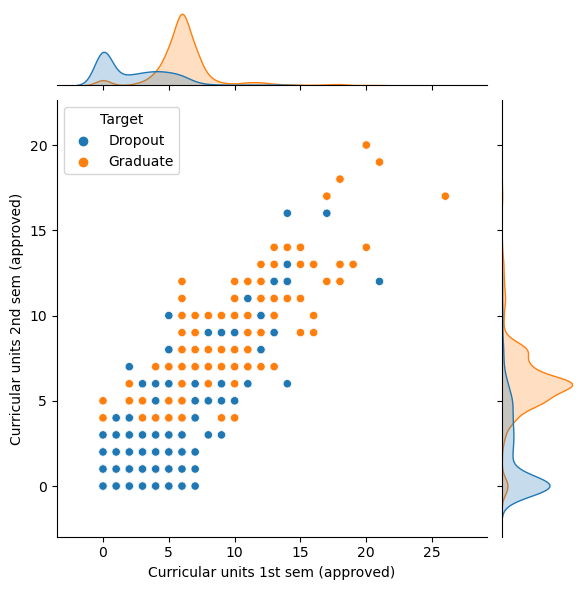

In [20]:
sns.jointplot(data=df, x='Curricular units 1st sem (approved)', y='Curricular units 2nd sem (approved)', hue="Target")

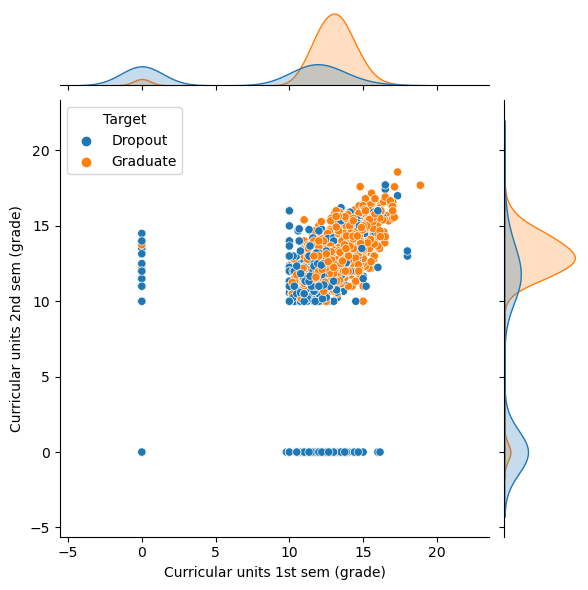

In [21]:
sns.jointplot(data=df, x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', hue="Target")

- ### I want to combine the two semesters' curricular units to make fewer variables there. 
- ### 1) Curricular units 1st sem (enrolled) + Curricular units 2nd sem (enrolled) = Curricular units all (enrolled)
  ### 2) Since Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) are also continuous variables that are highly correlated with each other. I decide to sum them up and be one variable called Curricular units grade. Curricular units 1st sem (grade) + Curricular units 2nd sem (grade) = Curricular units all (grade)

In [22]:
df = pd.read_csv("/Users/zzze/Downloads/dataset.csv")
df['Curricular units all (approved)'] = df["Curricular units 1st sem (approved)"] + df["Curricular units 2nd sem (approved)"] 
df['Curricular units all (enrolled)'] = df['Curricular units 1st sem (enrolled)']+ df['Curricular units 2nd sem (enrolled)']
df['Curricular units all (grade)'] = df['Curricular units 1st sem (grade)']+ df['Curricular units 2nd sem (grade)']

### To sum up, for the Academic data, the variables that I will keep are Curricular units all (enrolled), Curricular units all (grade), Curricular units all (approved)

## The final dataset would be: 

In [23]:
cols = ["Marital status", 'Displaced','Gender', 'Age at enrollment',
        "Mother's qualification", "Mother's occupation", 
        'Debtor', 'Tuition fees up to date', 'Scholarship holder',
        'Application mode', 'Course', 'Previous qualification',  
        'Curricular units all (approved)', "Curricular units all (grade)",
        "Curricular units all (enrolled)",
        'Target']
df = df[cols]
df.head()

,Marital status,Displaced,Gender,Age at enrollment,Mother's qualification,Mother's occupation,Debtor,Tuition fees up to date,Scholarship holder,Application mode,Course,Previous qualification,Curricular units all (approved),Curricular units all (grade),Curricular units all (enrolled),Target
0,1,1,1,20,13,6,0,1,0,8,2,1,0,0.000000,0,Dropout
1,1,1,1,19,1,4,0,0,0,6,11,1,12,27.666667,12,Graduate
2,1,1,1,19,22,10,0,0,0,1,5,1,0,0.000000,12,Dropout
3,1,1,0,20,23,6,0,1,0,8,15,1,11,25.828571,12,Graduate
4,2,0,0,45,22,10,0,1,0,12,3,1,11,25.333333,12,Graduate


In [24]:
# change the target column to 0/1 
encoder = {'Dropout':0,'Graduate':1} 
#I am going to drop the enrolled rows because I want to focus on dropout and graduate only
target_encoder = df['Target'].map(encoder)
target_encoder = target_encoder.dropna() #drop the NaN rows
df['Target'] = target_encoder
display(df)
df = df.dropna()


,Marital status,Displaced,Gender,Age at enrollment,Mother's qualification,Mother's occupation,Debtor,Tuition fees up to date,Scholarship holder,Application mode,Course,Previous qualification,Curricular units all (approved),Curricular units all (grade),Curricular units all (enrolled),Target
0,1,1,1,20,13,6,0,1,0,8,2,1,0,0.000000,0,0.0
1,1,1,1,19,1,4,0,0,0,6,11,1,12,27.666667,12,1.0
2,1,1,1,19,22,10,0,0,0,1,5,1,0,0.000000,12,0.0
3,1,1,0,20,23,6,0,1,0,8,15,1,11,25.828571,12,1.0
4,2,0,0,45,22,10,0,1,0,12,3,1,11,25.333333,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,0,1,19,1,6,0,1,0,1,15,1,10,26.266667,12,1.0
4420,1,1,0,18,1,10,1,0,0,1,15,1,8,23.000000,12,0.0
4421,1,1,0,30,22,10,0,1,1,1,12,1,8,28.412500,15,0.0
4422,1,1,0,20,22,8,0,1,1,1,9,1,10,25.800000,10,1.0


In [25]:
cols = df.columns
predictors = df[cols[0:15]]
target = df[cols[15]]
#get the scaled predictors and encoder target 
ss=StandardScaler()
predictors_scaled = pd.DataFrame(ss.fit_transform(predictors), columns = predictors.columns)
predictors_scaled.head()

,Marital status,Displaced,Gender,Age at enrollment,Mother's qualification,Mother's occupation,Debtor,Tuition fees up to date,Scholarship holder,Application mode,Course,Previous qualification,Curricular units all (approved),Curricular units all (grade),Curricular units all (enrolled)
0,-0.300686,0.906297,1.380697,-0.442212,0.049009,-0.327219,-0.358302,0.393167,-0.603447,0.226505,-1.828415,-0.392879,-1.486239,-2.031814,-2.653091
1,-0.300686,0.906297,1.380697,-0.569976,-1.283593,-0.866764,-0.358302,-2.543450,-0.603447,-0.154237,0.245261,-0.392879,0.429446,0.700843,-0.133114
2,-0.300686,0.906297,1.380697,-0.569976,1.048460,0.751869,-0.358302,-2.543450,-0.603447,-1.106094,-1.137190,-0.392879,-1.486239,-2.031814,-0.133114
3,-0.300686,0.906297,-0.724272,-0.442212,1.159510,-0.327219,-0.358302,0.393167,-0.603447,0.226505,1.166895,-0.392879,0.269806,0.519293,-0.133114
4,1.330837,-1.103391,-0.724272,2.751894,1.048460,0.751869,-0.358302,0.393167,-0.603447,0.987990,-1.598007,-0.392879,0.269806,0.470378,-0.133114


# **Modeling**

### Decision tree

In [26]:
X  = np.array(predictors)
y  = target
class_names   = class_names=['Dropout','Graduate']
feature_names = cols[0:15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
unpruned = DecisionTreeClassifier(max_depth=None, random_state=0)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

(2722, 15) (908, 15) (2722,) (908,)
Performance without pruning: 0.8634361233480177
At depth: 22


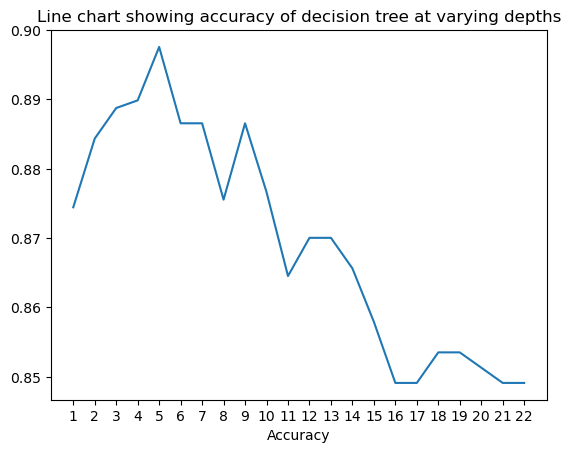

In [27]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=5)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
plt.title("Line chart showing accuracy of decision tree at varying depths")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

### Best performance is at depth 5

In [28]:
#decision tree
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [29]:
print("Performance at depth 5:", decision_tree.score(X_test, y_test))
print("At depth:", decision_tree.tree_.max_depth) 

Performance at depth 5: 0.8953744493392071
At depth: 5


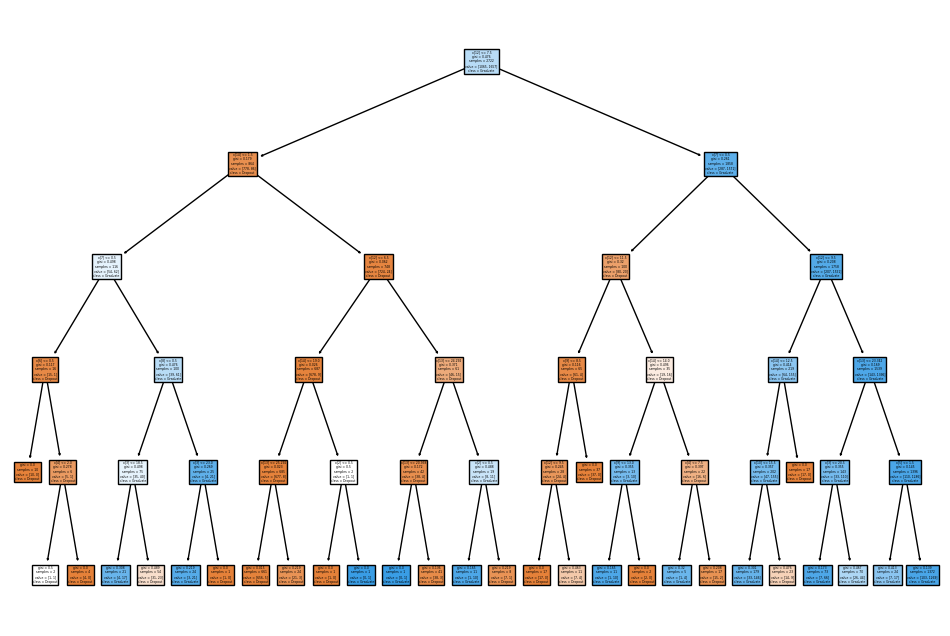

In [30]:
plt.figure(figsize = (12,8))
plot_tree(decision_tree, filled=True, class_names = class_names)
plt.show()

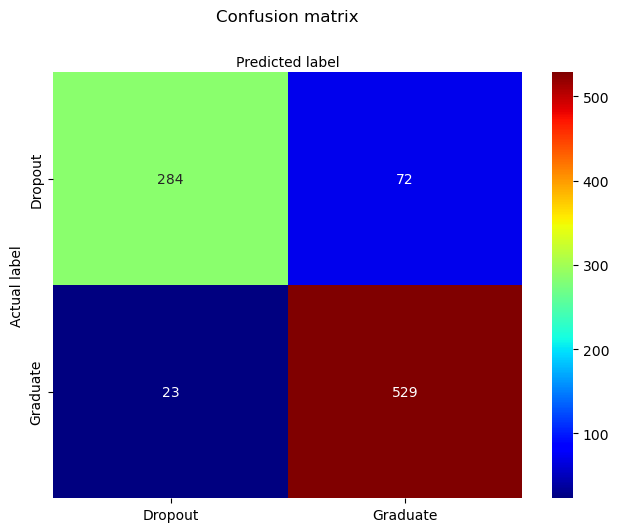

In [31]:
y_pred_dt = decision_tree.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

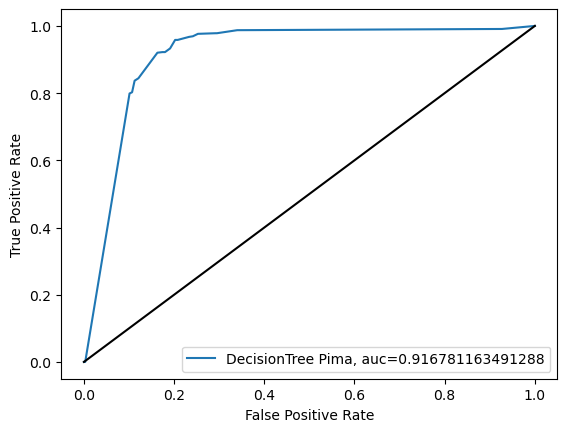

In [32]:
y_pprob_dt = decision_tree.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob_dt[:,1])
auc = roc_auc_score(y_test, y_pprob_dt[:,1])
plt.plot(fpr,tpr,label="DecisionTree Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Curricular units all (approved)'),
  Text(1, 0, 'Tuition fees up to date'),
  Text(2, 0, 'Curricular units all (enrolled)'),
  Text(3, 0, 'Curricular units all (grade)'),
  Text(4, 0, 'Age at enrollment'),
  Text(5, 0, 'Course'),
  Text(6, 0, 'Gender'),
  Text(7, 0, "Mother's qualification"),
  Text(8, 0, 'Scholarship holder'),
  Text(9, 0, 'Application mode'),
  Text(10, 0, "Mother's occupation"),
  Text(11, 0, 'Debtor'),
  Text(12, 0, 'Marital status'),
  Text(13, 0, 'Displaced'),
  Text(14, 0, 'Previous qualification')])

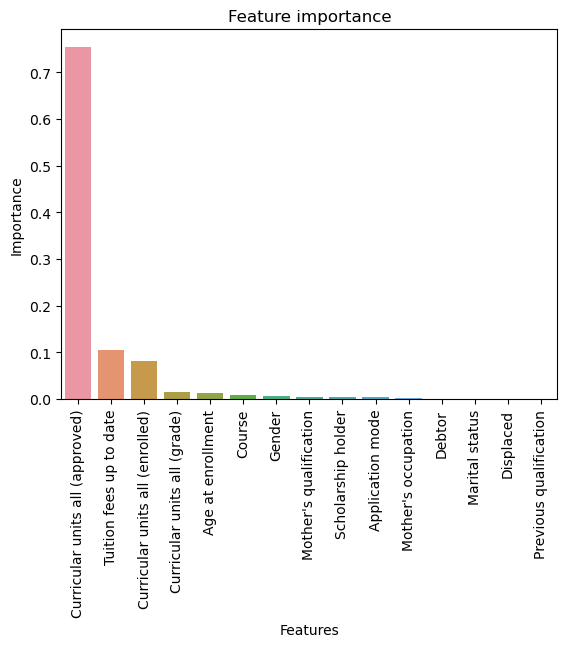

In [45]:
feature_imp = pd.Series(decision_tree.feature_importances_)
feature_imp.index = df.columns[:15]

feature_imp.sort_values(ascending=False)
imp_feat = feature_imp.sort_values(ascending=False)
sns.barplot(x=imp_feat.index, y=imp_feat.values)

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature importance")
plt.xticks(rotation=90)

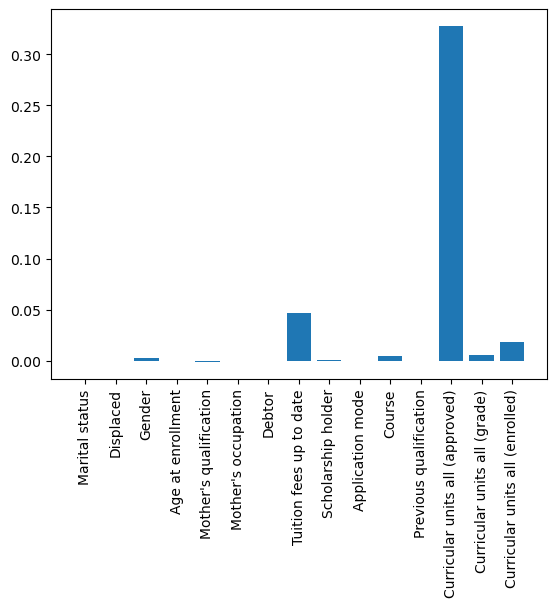

In [33]:
from sklearn.inspection import permutation_importance
result = permutation_importance(decision_tree,X_test,y_test,n_repeats = 10)
plt.bar(feature_names,result['importances_mean']) 
plt.xticks(feature_names,rotation=90)
plt.show()

### Random Forest

In [34]:
X  = np.array(predictors_scaled)
y  = target
class_names   = class_names=['Dropout','Graduate']
feature_names = cols[0:15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

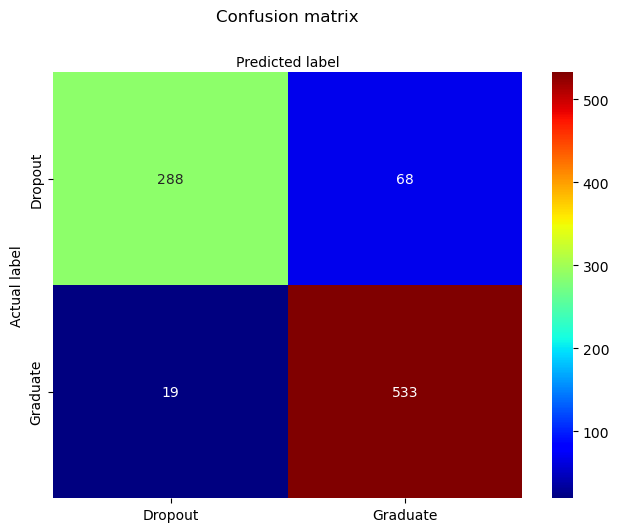

In [35]:
y_pred_rf = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

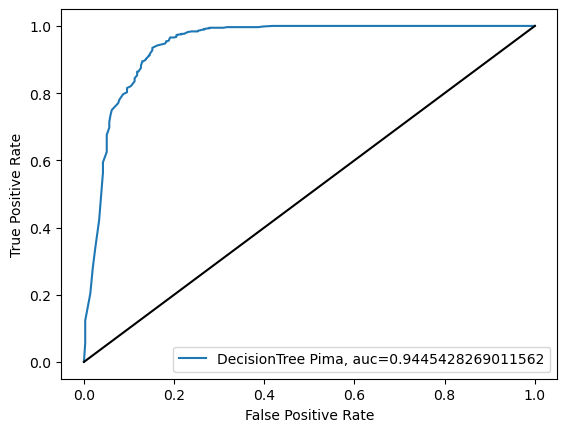

In [36]:
y_pprob_rf = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob_rf[:,1])
auc = roc_auc_score(y_test, y_pprob_rf[:,1])
plt.plot(fpr,tpr,label="DecisionTree Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

accuracy score: 0.90
precision score: 0.89
recall score: 0.97


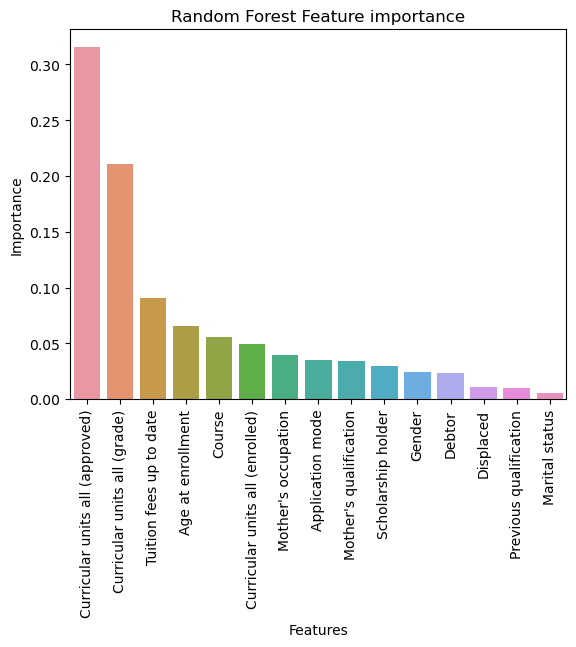

In [46]:
feature_imp = pd.Series(rf.feature_importances_)
feature_imp.index = df.columns[:15]

feature_imp.sort_values(ascending=False)
imp_feat = feature_imp.sort_values(ascending=False)
sns.barplot(x=imp_feat.index, y=imp_feat.values)

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature importance")
plt.xticks(rotation=90)

print('accuracy score: %.2f' % accuracy_score(y_test,y_pred_rf))
print('precision score: %.2f' % precision_score(y_test,y_pred_rf))
print('recall score: %.2f' % recall_score(y_test,y_pred_rf))

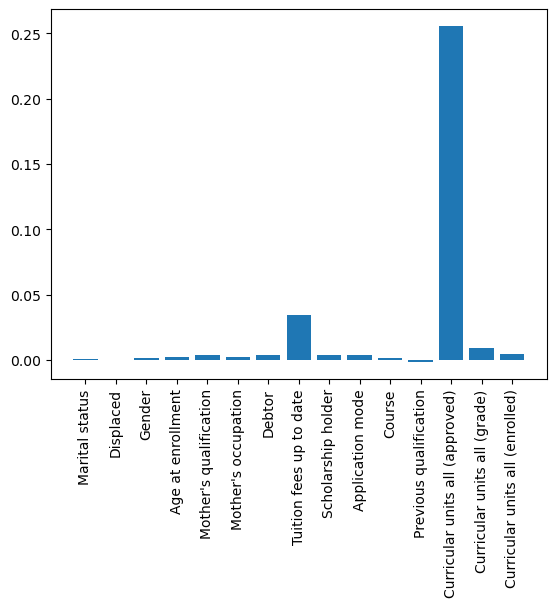

In [38]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf,X_test,y_test,n_repeats = 10)
plt.bar(feature_names,result['importances_mean'])
plt.xticks(feature_names,rotation=90)
plt.show() 

### XGBoost

In [39]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

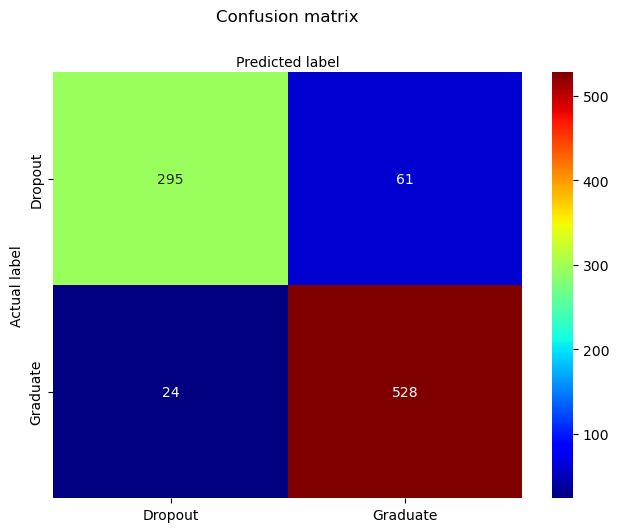

In [40]:
y_pred_xgb = xgb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

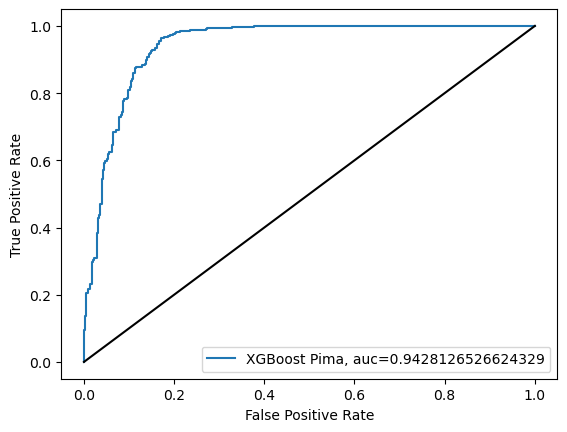

In [41]:
y_pprob_xgb = xgb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob_xgb[:,1])
auc = roc_auc_score(y_test, y_pprob_xgb[:,1])
plt.plot(fpr,tpr,label="XGBoost Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

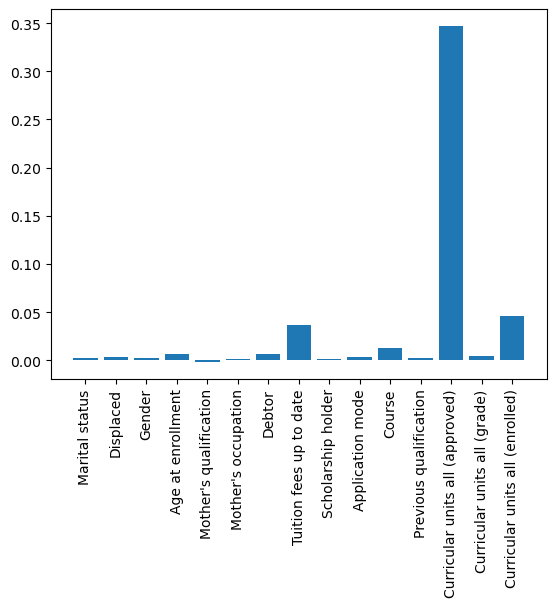

In [42]:
from sklearn.inspection import permutation_importance
result = permutation_importance(xgb,X_test,y_test,n_repeats = 10)
plt.bar(feature_names,result['importances_mean'])
plt.xticks(feature_names,rotation=90)
plt.show() 

accuracy score: 0.90
precision score: 0.89
recall score: 0.97


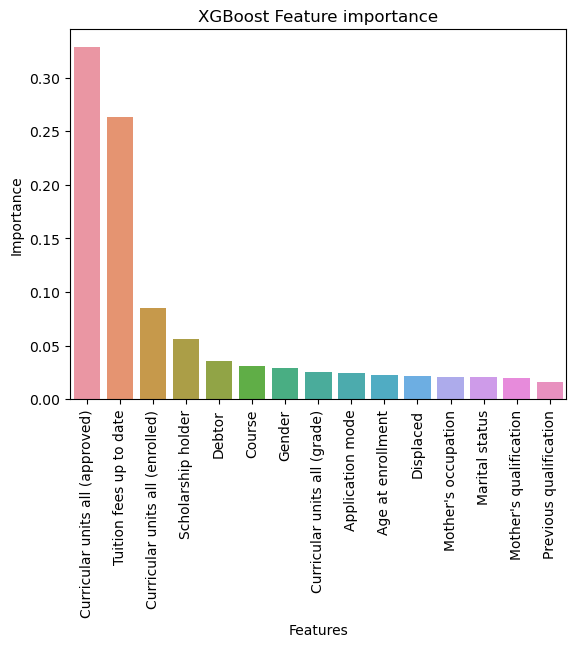

In [54]:
feature_imp = pd.Series(xgb.feature_importances_)
feature_imp.index = df.columns[:15]

feature_imp.sort_values(ascending=False)
imp_feat = feature_imp.sort_values(ascending=False)
sns.barplot(x=imp_feat.index, y=imp_feat.values)

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("XGBoost Feature importance")
plt.xticks(rotation=90)

print('accuracy score: %.2f' % accuracy_score(y_test,y_pred_rf))
print('precision score: %.2f' % precision_score(y_test,y_pred_rf))
print('recall score: %.2f' % recall_score(y_test,y_pred_rf))


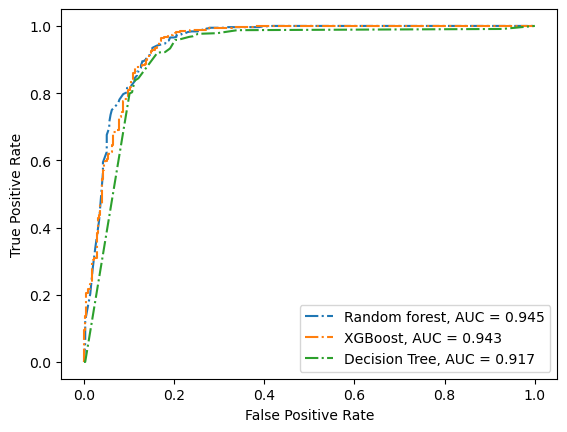

In [56]:
import operator
y_pprobs = {'Decision Tree': y_pprob_dt[:,1], 'Random forest': y_pprob_rf[:,1], 'XGBoost': y_pprob_xgb[:,1]}
aucs = {}
for i in y_pprobs.keys():
    aucs[i] = metrics.roc_auc_score(y_test, y_pprobs[i])
    
for i in dict(sorted(aucs.items(), key=operator.itemgetter(1), reverse=True)).keys():
    fpr, tpr, _= metrics.roc_curve(y_test, y_pprobs[i])
    auc = aucs[i]
    plt.plot(fpr, tpr, linestyle='dashdot', label=f'{i}, AUC = {auc:.3f}')
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()